<a href="https://colab.research.google.com/github/andradenathan/algebra-linear-algoritmica-2023-2/blob/main/gram_schmidt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratório de Ortogonalização

#### Nome: Nathan Andrade dos Santos Lobo
#### DRE: 120082390

In [454]:
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt

A = np.array([
    [2,1,3,4],
    [4,5,8,9],
    [-16,-17,-31,-35],
    [12,12,23,26],
    [20,22,39,44]
])

### 1) Quais são os vetores linearmente independentes?

In [455]:
def pegar_vetores_linearmente_independente(U):
  (n, m) = U.shape
  LI = np.zeros((n,m))
  for i in range(n):
    vetor_nulo = all(map(lambda v: v == 0, U[i]))
    if not vetor_nulo:
      LI[:, i] = A[i]

  colunas_nao_nulas = np.all(LI != 0, axis=0)
  LI = LI[:, colunas_nao_nulas]
  return LI

In [456]:
P, L, U = lu(A.T)
vetores_linearmente_independente = pegar_vetores_linearmente_independente(U)
print(vetores_linearmente_independente)

[[  2.   4. -16.]
 [  1.   5. -17.]
 [  3.   8. -31.]
 [  4.   9. -35.]]


#### 2) A partir deles como encontrar geradores para o mesmo espaço ortonormais?

Através do algoritmo de *Gram-Schmidt*. Do pseudocódigo da apostila do Collier, na página 162, temos:

Passo 1. inicialize $β$ como a lista vazia \\
Passo 2. atribua a $u_{1}$ a normalização de $v_{1}$ \\
Passo 3. para $i$ = $2$, $\cdots$, $m$ faça: \\
$\hspace{3cm}$ calcule $w_i$ = $v_i$ - $\langle  \; v_i, u_1 \; \rangle$ $u_1$ $- \cdots - \langle  \; v_i, u_{i-1} \; \rangle$ $u_{i-1}$ \\
$\hspace{3cm}$ atribua a $u_{i}$ a normalização de $w_{i}$ \\
$\hspace{3cm}$ acrescente $u_{i}$ ao final de β

retorne $β$.

In [457]:
def gram_schmidt(vetores_LI):
  (n, m) = vetores_LI.shape
  base_ortonormal = np.zeros((n, m))
  for i in range(m):
    w_i = vetores_LI[:, i]
    for j in range(i):
      u_j = vetores_LI[:, j]
      w_i = w_i - np.dot(u_j, w_i) * u_j
    w_i = w_i / np.linalg.norm(w_i)
    base_ortonormal[:, i] = w_i
  return base_ortonormal

base_ortonormal = gram_schmidt(vetores_linearmente_independente)
print(base_ortonormal)

[[ 0.36514837 -0.36738037 -0.29284666]
 [ 0.18257419 -0.17592863 -0.36761626]
 [ 0.54772256 -0.54589619 -0.58673565]
 [ 0.73029674 -0.73217356 -0.65942429]]


In [458]:
def corretude_gram_schmidt(A):
  (n,m) = A.shape
  tolerancia = 1e-18
  for i in range(m):
    v_i = A[:, i]
    for j in range(i+1, n-1):
      v_j = A[:, j]
      produto_interno = np.dot(v_i, v_j)
      if abs(produto_interno) > tolerancia:
        print(f"<v_i, v_j> = 0 para v_i: {v_i} e v_j: {v_j}")
      else:
        print(produto_interno)

corretude_gram_schmidt(base_ortonormal)

<v_i, v_j> = 0 para v_i: [0.36514837 0.18257419 0.54772256 0.73029674] e v_j: [-0.36738037 -0.17592863 -0.54589619 -0.73217356]
<v_i, v_j> = 0 para v_i: [0.36514837 0.18257419 0.54772256 0.73029674] e v_j: [-0.29284666 -0.36761626 -0.58673565 -0.65942429]
<v_i, v_j> = 0 para v_i: [-0.36738037 -0.17592863 -0.54589619 -0.73217356] e v_j: [-0.29284666 -0.36761626 -0.58673565 -0.65942429]


In [555]:
from random import choice

def random_color():
  return choice(['b', 'g', 'r', 'c', 'k', 'y', 'orange', 'm'])

def visualizar_gram_schmidt(vetores_LI, visualizacao = '2d'):
  visualizacoes = ['2d', '3d']
  if visualizacao not in visualizacoes:
    raise RuntimeError('Você só pode visualizar o gráfico 2D ou 3D.')

  base = gram_schmidt(vetores_LI)

  if visualizacao == '2d':
    fig, ax = plt.subplots()
    for i in range(vetores_LI.shape[0]):
      ax.quiver(0,0, vetores_LI[i, 0], vetores_LI[i, 1], angles='xy', scale_units='xy', scale=1, color=random_color(), label=f'Vetor {i}')

    for i in range(base.shape[0]):
      ax.quiver(0,0, base[i, 0], base[i, 1], angles='xy', scale_units='xy', scale=1, color=random_color(), label=f'Gram Schmidt {i}')

    ax.set_aspect('equal')
    plt.grid()

  elif visualizacao == '3d':
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(vetores_LI.shape[0]):
      ax.quiver(0,0,0, vetores_LI[i, 0], vetores_LI[i, 1], vetores_LI[i, 2], color=random_color())

    for i in range(base.shape[0]):
      ax.quiver(0,0,0, base[i, 0], base[i, 1], base[i, 2], color=random_color())

  max_norm = max(np.linalg.norm(vetores_LI).max(), np.linalg.norm(base).max())
  ax.set_xlim([-max_norm, max_norm])
  ax.set_ylim([-max_norm, max_norm])

  if vetores_LI.shape[1] == 3:
    ax.set_zlim([-max_norm, max_norm])

  ax.legend()

  plt.show()

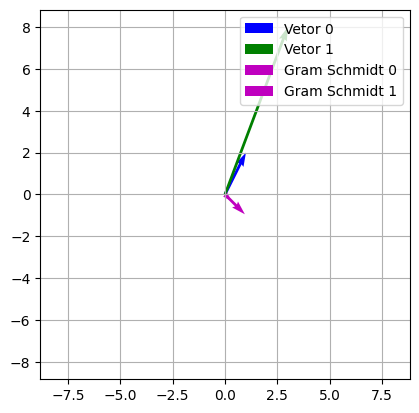

In [556]:
V = np.array([
    [1,2],
    [3,8],
])
visualizar_gram_schmidt(V, '2d')